In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


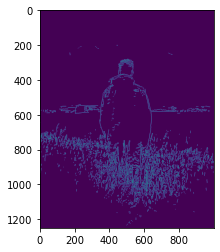

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# Set high and low threshold ratios
highThresholdRatio = 0.17
lowThresholdRatio = 0.12

# Load image
img = cv.imread('imgg.jpg')

# Convert to grayscale
img = cv.cvtColor(np.float32(img), cv.COLOR_BGR2GRAY)

# Apply Gaussian filter
img_smooth = cv.GaussianBlur(img, (5,5), 1)

# Calculate gradient magnitude and direction
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
Gx = cv.filter2D(src=img_smooth, kernel=sobel_x, ddepth=-1)
Gy = cv.filter2D(src=img_smooth, kernel=sobel_y, ddepth=-1)
#Gx = cv.Sobel(img_smooth, cv.CV_64F, 1, 0, ksize=3)
#Gy = cv.Sobel(img_smooth, cv.CV_64F, 0, 1, ksize=3)
gradient_mag = np.sqrt(Gx**2 + Gy**2)
gradient_dir = np.arctan2(Gy, Gx) * 180 / np.pi

# Non-maximum suppression
M, N = img.shape
nms = np.zeros((M, N), dtype=np.int32)
for i in range(1, M-1):
    for j in range(1, N-1):
        dir = gradient_dir[i, j]
        if dir < 0:
            dir += 180
        dir_round = int((dir + 22.5) / 45) % 4
        if dir_round == 0:  # East-West (horizontal)
            if (gradient_mag[i, j] > gradient_mag[i, j-1]) and (gradient_mag[i, j] > gradient_mag[i, j+1]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 1:  # North-East/South-West
            if (gradient_mag[i, j] > gradient_mag[i-1, j+1]) and (gradient_mag[i, j] > gradient_mag[i+1, j-1]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 2:  # North-South (vertical)
            if (gradient_mag[i, j] > gradient_mag[i-1, j]) and (gradient_mag[i, j] > gradient_mag[i+1, j]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 3:  # North-West/South-East
            if (gradient_mag[i, j] > gradient_mag[i-1, j-1]) and (gradient_mag[i, j] > gradient_mag[i+1, j+1]):
                nms[i, j] = gradient_mag[i, j]

# Hysteresis thresholding
high_threshold = np.max(nms) * highThresholdRatio
low_threshold = high_threshold * lowThresholdRatio
strong_edges = nms > high_threshold
weak_edges = (nms > low_threshold) & (nms < high_threshold)
for i in range(1, M-1):
    for j in range(1, N-1):
        if weak_edges[i, j]:
            if strong_edges[i-1:i+2, j-1:j+2].any():
                strong_edges[i, j] = True
                weak_edges[i, j] = False

# Display edges
plt.imshow(strong_edges)

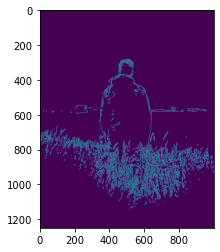

In [3]:
# Opencv Canny
img = cv.imread('imgg.jpg', 0)
edges = edges = cv.Canny(img,100,200)
plt.imshow(edges)